<a href="https://colab.research.google.com/github/Aya-Elhoseny77/AI-Diploma/blob/main/Traffic%2C_Driving_Style_and_Road_Surface_Condition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# Read each CSV file, handling parsing errors by filling unexpected fields
def read_csv_error(file_path):
    try:
        return pd.read_csv(file_path, sep=";")
    except pd.errors.ParserError:
        print(f"Error parsing {file_path}. Filling with 'null' values")
        return pd.read_csv(file_path, sep=";", on_bad_lines = 'skip')

In [7]:
df_peugeot_01 =read_csv_error('/content/peugeot_207_01.csv')
df_peugeot_02 = read_csv_error('/content/peugeot_207_02.csv')

df_opel_01 = read_csv_error('/content/opel_corsa_01.csv')
df_opel_02 = read_csv_error('/content/opel_corsa_02.csv')

**Peugeot**

In [8]:
df_peugeot_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8614 entries, 0 to 8613
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AltitudeVariation          8551 non-null   object 
 1   VehicleSpeedInstantaneous  8605 non-null   object 
 2   VehicleSpeedAverage        8199 non-null   object 
 3   VehicleSpeedVariance       8199 non-null   object 
 4   VehicleSpeedVariation      8536 non-null   object 
 5   LongitudinalAcceleration   8614 non-null   object 
 6   EngineLoad                 8609 non-null   object 
 7   EngineCoolantTemperature   8609 non-null   float64
 8   ManifoldAbsolutePressure   8609 non-null   float64
 9   EngineRPM                  8609 non-null   object 
 10  MassAirFlow                8609 non-null   object 
 11  IntakeAirTemperature       8609 non-null   float64
 12  VerticalAcceleration       8614 non-null   object 
 13  FuelConsumptionAverage     8518 non-null   objec

In [15]:
df_peugeot_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4623 entries, 0 to 4622
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   AltitudeVariation          4596 non-null   object
 1   VehicleSpeedInstantaneous  4603 non-null   object
 2   VehicleSpeedAverage        4446 non-null   object
 3   VehicleSpeedVariance       4446 non-null   object
 4   VehicleSpeedVariation      4585 non-null   object
 5   LongitudinalAcceleration   4623 non-null   object
 6   EngineLoad                 4623 non-null   object
 7   EngineCoolantTemperature   4623 non-null   int64 
 8   ManifoldAbsolutePressure   4623 non-null   int64 
 9   EngineRPM                  4623 non-null   object
 10  MassAirFlow                4623 non-null   object
 11  IntakeAirTemperature       4623 non-null   int64 
 12  VerticalAcceleration       4623 non-null   object
 13  FuelConsumptionAverage     4582 non-null   object
 14  roadSurf

In [10]:
peugeot = pd.concat([df_peugeot_01, df_peugeot_02]) #merging

peugeot = peugeot.drop_duplicates()

In [16]:
peugeot .info()

<class 'pandas.core.frame.DataFrame'>
Index: 13237 entries, 0 to 4622
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AltitudeVariation          13147 non-null  float64
 1   VehicleSpeedInstantaneous  13208 non-null  float64
 2   VehicleSpeedAverage        12645 non-null  float64
 3   VehicleSpeedVariance       12645 non-null  float64
 4   VehicleSpeedVariation      13121 non-null  float64
 5   LongitudinalAcceleration   13237 non-null  float64
 6   EngineLoad                 13232 non-null  float64
 7   EngineCoolantTemperature   13232 non-null  float64
 8   ManifoldAbsolutePressure   13232 non-null  float64
 9   EngineRPM                  13232 non-null  float64
 10  MassAirFlow                13232 non-null  float64
 11  IntakeAirTemperature       13232 non-null  float64
 12  VerticalAcceleration       13237 non-null  float64
 13  FuelConsumptionAverage     13100 non-null  float64
 

In [18]:
column_names = ['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage', 'VehicleSpeedVariation',
                'VehicleSpeedVariance', 'LongitudinalAcceleration', 'EngineLoad',
                'EngineRPM', 'MassAirFlow', 'VerticalAcceleration', 'FuelConsumptionAverage']

In [19]:
for col in column_names:
    # Apply the replacement only on string values that contain a comma
    peugeot[col] = peugeot[col].apply(lambda x: str(x).replace(',', '.') if isinstance(x, str) and ',' in x else x)

    peugeot[col] = peugeot[col].astype(float)

    peugeot["brand"] = "peugeot"


In [20]:
peugeot.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle,brand
0,NaN,0.0,NaN,NaN,NaN,0.0418,36.470589,28.0,100.0,802.5,10.30,14.0,0.0118,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,peugeot
1,NaN,0.0,NaN,NaN,NaN,0.0713,36.470589,28.0,100.0,802.5,10.30,14.0,-0.0023,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,peugeot
2,NaN,0.0,NaN,NaN,NaN,0.0952,36.470589,29.0,100.0,798.5,10.24,14.0,-0.0135,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,peugeot
3,NaN,0.0,NaN,NaN,NaN,0.1136,36.470589,29.0,100.0,798.5,10.24,15.0,-0.0161,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,peugeot
4,NaN,0.0,NaN,NaN,NaN,0.1274,36.470589,29.0,100.0,804.5,10.36,15.0,-0.0160,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,peugeot


In [21]:
# Drop the null values of these columns

peugeot.dropna(subset=(['EngineLoad','AltitudeVariation', 'VehicleSpeedInstantaneous']), inplace=True)

peugeot.isnull().sum()

,0
AltitudeVariation,0
VehicleSpeedInstantaneous,0
VehicleSpeedAverage,499
VehicleSpeedVariance,499
VehicleSpeedVariation,24
LongitudinalAcceleration,0
EngineLoad,0
EngineCoolantTemperature,0
ManifoldAbsolutePressure,0
EngineRPM,0


In [22]:
# Drop the remaining null values
peugeot.dropna(inplace=True)

peugeot.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12632 entries, 59 to 4622
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AltitudeVariation          12632 non-null  float64
 1   VehicleSpeedInstantaneous  12632 non-null  float64
 2   VehicleSpeedAverage        12632 non-null  float64
 3   VehicleSpeedVariance       12632 non-null  float64
 4   VehicleSpeedVariation      12632 non-null  float64
 5   LongitudinalAcceleration   12632 non-null  float64
 6   EngineLoad                 12632 non-null  float64
 7   EngineCoolantTemperature   12632 non-null  float64
 8   ManifoldAbsolutePressure   12632 non-null  float64
 9   EngineRPM                  12632 non-null  float64
 10  MassAirFlow                12632 non-null  float64
 11  IntakeAirTemperature       12632 non-null  float64
 12  VerticalAcceleration       12632 non-null  float64
 13  FuelConsumptionAverage     12632 non-null  float64


**Opel**

In [23]:
df_opel_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7392 entries, 0 to 7391
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   AltitudeVariation          7338 non-null   object
 1   VehicleSpeedInstantaneous  7385 non-null   object
 2   VehicleSpeedAverage        7038 non-null   object
 3   VehicleSpeedVariance       7038 non-null   object
 4   VehicleSpeedVariation      7358 non-null   object
 5   LongitudinalAcceleration   7392 non-null   object
 6   EngineLoad                 7392 non-null   object
 7   EngineCoolantTemperature   7392 non-null   int64 
 8   ManifoldAbsolutePressure   7392 non-null   int64 
 9   EngineRPM                  7392 non-null   int64 
 10  MassAirFlow                7392 non-null   object
 11  IntakeAirTemperature       7392 non-null   int64 
 12  VerticalAcceleration       7392 non-null   object
 13  FuelConsumptionAverage     7295 non-null   object
 14  roadSurf

In [24]:
df_opel_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4328 entries, 0 to 4327
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   AltitudeVariation          4292 non-null   object
 1   VehicleSpeedInstantaneous  4320 non-null   object
 2   VehicleSpeedAverage        4092 non-null   object
 3   VehicleSpeedVariance       4092 non-null   object
 4   VehicleSpeedVariation      4290 non-null   object
 5   LongitudinalAcceleration   4328 non-null   object
 6   EngineLoad                 4328 non-null   object
 7   EngineCoolantTemperature   4328 non-null   int64 
 8   ManifoldAbsolutePressure   4328 non-null   int64 
 9   EngineRPM                  4328 non-null   int64 
 10  MassAirFlow                4328 non-null   object
 11  IntakeAirTemperature       4328 non-null   int64 
 12  VerticalAcceleration       4328 non-null   object
 13  FuelConsumptionAverage     4276 non-null   object
 14  roadSurf

In [25]:
opel = pd.concat([df_opel_01,df_opel_02])

opel = opel.drop_duplicates()

In [26]:
opel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11720 entries, 0 to 4327
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   AltitudeVariation          11630 non-null  object
 1   VehicleSpeedInstantaneous  11705 non-null  object
 2   VehicleSpeedAverage        11130 non-null  object
 3   VehicleSpeedVariance       11130 non-null  object
 4   VehicleSpeedVariation      11648 non-null  object
 5   LongitudinalAcceleration   11720 non-null  object
 6   EngineLoad                 11720 non-null  object
 7   EngineCoolantTemperature   11720 non-null  int64 
 8   ManifoldAbsolutePressure   11720 non-null  int64 
 9   EngineRPM                  11720 non-null  int64 
 10  MassAirFlow                11720 non-null  object
 11  IntakeAirTemperature       11720 non-null  int64 
 12  VerticalAcceleration       11720 non-null  object
 13  FuelConsumptionAverage     11571 non-null  object
 14  roadSurface 

In [27]:
for col in column_names:
    # Apply the replacement only on string values that contain a comma
    opel[col] = opel[col].apply(lambda x: str(x).replace(',', '.') if isinstance(x, str) and ',' in x else x)



In [28]:
 # Convert the column to float
opel[col] = opel[col].astype(float)

opel["brand"]="opel"


In [29]:
opel.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle,brand
0,NaN,0,NaN,NaN,NaN,0.0156,25.49019623,64,100,801,7.849999905,22,-0.0078,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel
1,NaN,0,NaN,NaN,NaN,0.0156,25.49019623,64,100,803,7.889999866,22,-0.0156,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel
2,NaN,NaN,NaN,NaN,NaN,0.0273,25.88235283,64,100,800,7.769999981,22,-0.0273,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel
3,NaN,NaN,NaN,NaN,NaN,0.0391,25.88235283,64,100,798,7.769999981,22,-0.0273,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel
4,NaN,0,NaN,NaN,NaN,0.0469,25.88235283,65,100,798,7.940000057,22,-0.0312,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel


In [30]:
opel.dropna(subset=(['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedVariation']), inplace=True)


opel.isnull().sum()

,0
AltitudeVariation,0
VehicleSpeedInstantaneous,0
VehicleSpeedAverage,480
VehicleSpeedVariance,480
VehicleSpeedVariation,0
LongitudinalAcceleration,0
EngineLoad,0
EngineCoolantTemperature,0
ManifoldAbsolutePressure,0
EngineRPM,0


In [31]:
for col in column_names:
 # Apply the replacement only on string values that contain a comma
 opel[col] = opel[col].apply(lambda x: str(x).replace(',', '.') if isinstance(x, str) and ',' in x else x)
 # Convert the column to float inside the loop for each column
 opel[col] = opel[col].astype(float)

opel["brand"] = "opel"

In [32]:
opel.isnull().sum()

,0
AltitudeVariation,0
VehicleSpeedInstantaneous,0
VehicleSpeedAverage,480
VehicleSpeedVariance,480
VehicleSpeedVariation,0
LongitudinalAcceleration,0
EngineLoad,0
EngineCoolantTemperature,0
ManifoldAbsolutePressure,0
EngineRPM,0


In [33]:
# the 'object' values of 'peugeot' dataset
value_road_peugeot = peugeot['roadSurface'].value_counts()
value_traffic_peugeot = peugeot['traffic'].value_counts()
value_driving_peugeot = peugeot['drivingStyle'].value_counts()

print(value_road_peugeot)
print('-----------')
print(value_traffic_peugeot)
print('-----------')
print(value_driving_peugeot)

roadSurface
UnevenCondition         5835
SmoothCondition         3550
FullOfHolesCondition    3247
Name: count, dtype: int64
-----------
traffic
LowCongestionCondition       7705
HighCongestionCondition      2470
NormalCongestionCondition    2457
Name: count, dtype: int64
-----------
drivingStyle
EvenPaceStyle      11962
AggressiveStyle      670
Name: count, dtype: int64


In [34]:
# the 'object' values of 'opel' dataset:
value_road_opel = opel['roadSurface'].value_counts()
value_traffic_opel = opel['traffic'].value_counts()
value_driving_opel = opel['drivingStyle'].value_counts()

print(value_road_opel)
print('-----------')
print(value_traffic_opel)
print('-----------')
print(value_driving_opel)

roadSurface
SmoothCondition    11165
UnevenCondition      445
Name: count, dtype: int64
-----------
traffic
LowCongestionCondition       10532
HighCongestionCondition        545
NormalCongestionCondition      533
Name: count, dtype: int64
-----------
drivingStyle
EvenPaceStyle      9420
AggressiveStyle    2190
Name: count, dtype: int64


**Merge both
 Peugeot and Opel**

In [35]:
df = pd.concat([peugeot, opel])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24242 entries, 59 to 4327
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AltitudeVariation          24242 non-null  float64
 1   VehicleSpeedInstantaneous  24242 non-null  float64
 2   VehicleSpeedAverage        23762 non-null  float64
 3   VehicleSpeedVariance       23762 non-null  float64
 4   VehicleSpeedVariation      24242 non-null  float64
 5   LongitudinalAcceleration   24242 non-null  float64
 6   EngineLoad                 24242 non-null  float64
 7   EngineCoolantTemperature   24242 non-null  float64
 8   ManifoldAbsolutePressure   24242 non-null  float64
 9   EngineRPM                  24242 non-null  float64
 10  MassAirFlow                24242 non-null  float64
 11  IntakeAirTemperature       24242 non-null  float64
 12  VerticalAcceleration       24242 non-null  float64
 13  FuelConsumptionAverage     24185 non-null  float64


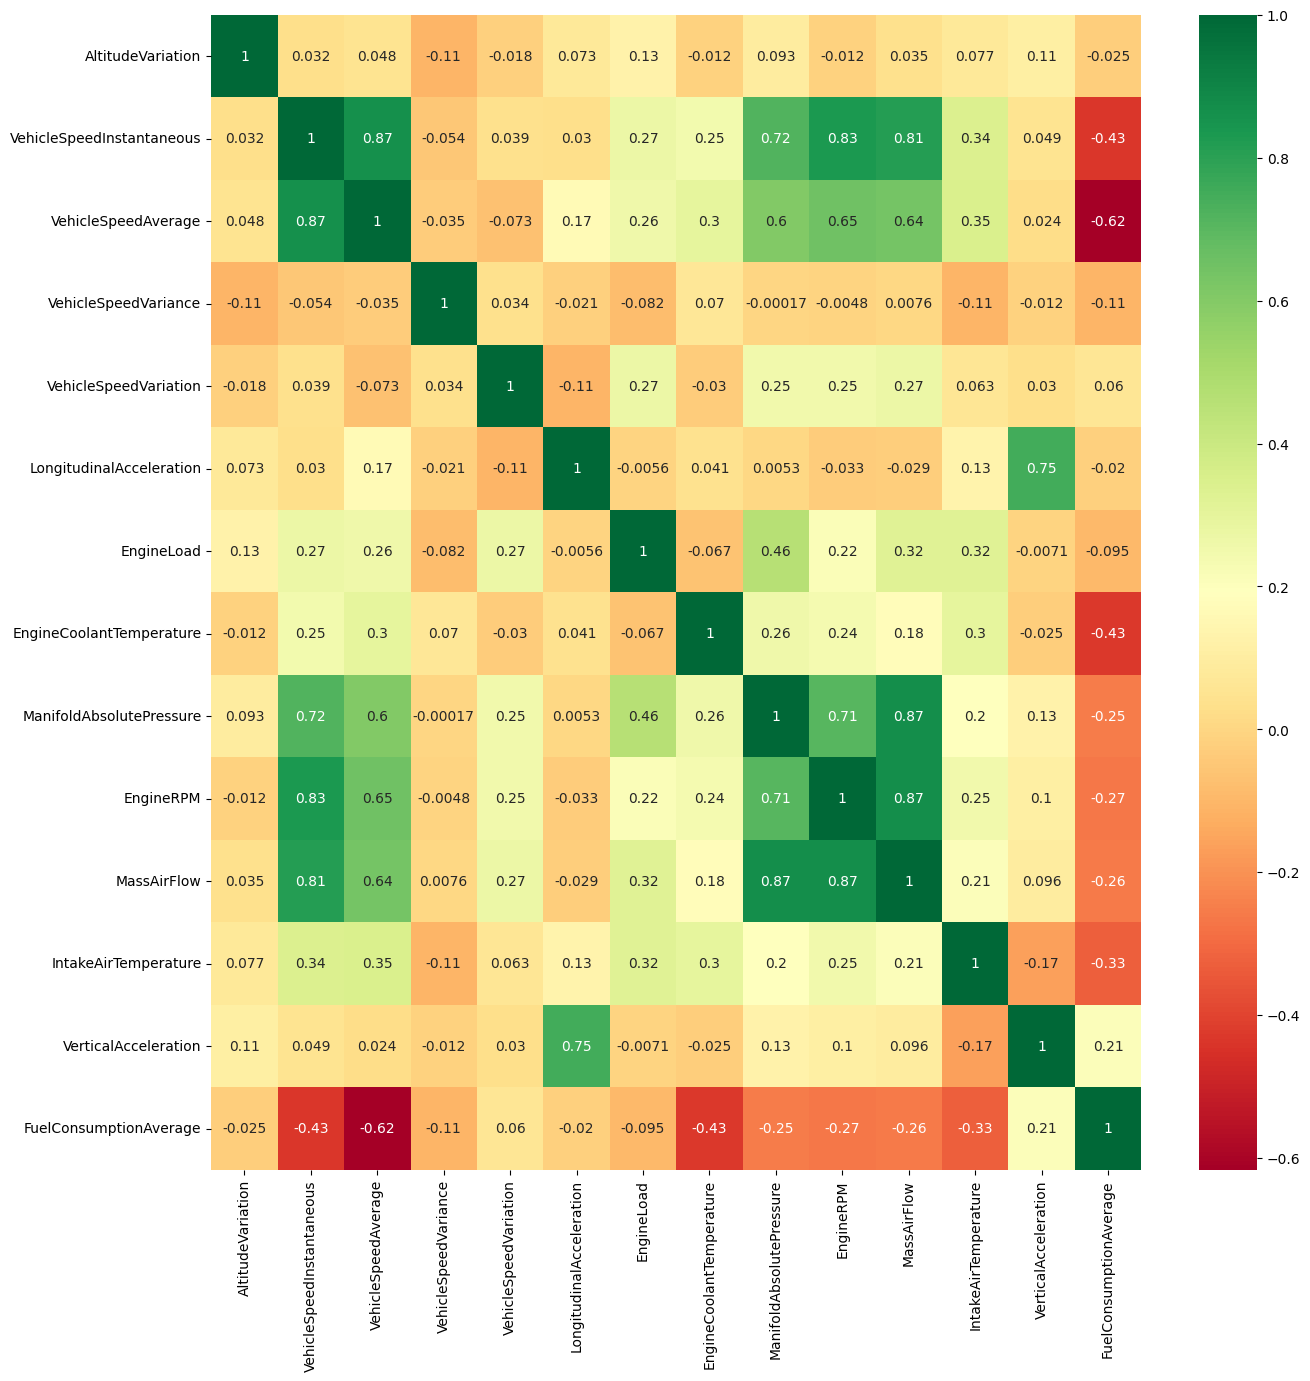

In [36]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn", annot_kws={"size":10})

plt.show()